<a href="https://colab.research.google.com/github/AhmadAlAshery/Tensorflow/blob/main/financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
;

''

In [98]:
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web

In [3]:
url_genting = 'https://drive.google.com/file/d/1VVzjd8UBXOyh4Lp43hS-TtALgO7aZvPL/view?usp=sharing'
path_genting = 'https://drive.google.com/uc?export=download&id='+url_genting.split('/')[-2]


url_airline = 'https://drive.google.com/file/d/1kd-Yf6Ss1R1_1DG5kTUaMgCNnBNjJQWr/view?usp=sharing'
path_airline = 'https://drive.google.com/uc?export=download&id='+url_airline.split('/')[-2]

url_jard = 'https://drive.google.com/file/d/1-oi2XjWKU1_jBiuaBvbJuQbruKYx4Qgf/view?usp=sharing'
path_jard = 'https://drive.google.com/uc?export=download&id='+url_jard.split('/')[-2]


In [4]:
genting = pd.read_csv(path_genting, parse_dates=['Date'])
airline = pd.read_csv(path_airline, parse_dates=['Date'])
jardine = pd.read_csv(path_jard, parse_dates=['Date'])

In [5]:
genting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1435 non-null   datetime64[ns]
 1   Open       1435 non-null   float64       
 2   High       1435 non-null   float64       
 3   Low        1435 non-null   float64       
 4   Close      1435 non-null   float64       
 5   Adj Close  1435 non-null   float64       
 6   Volume     1435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.6 KB


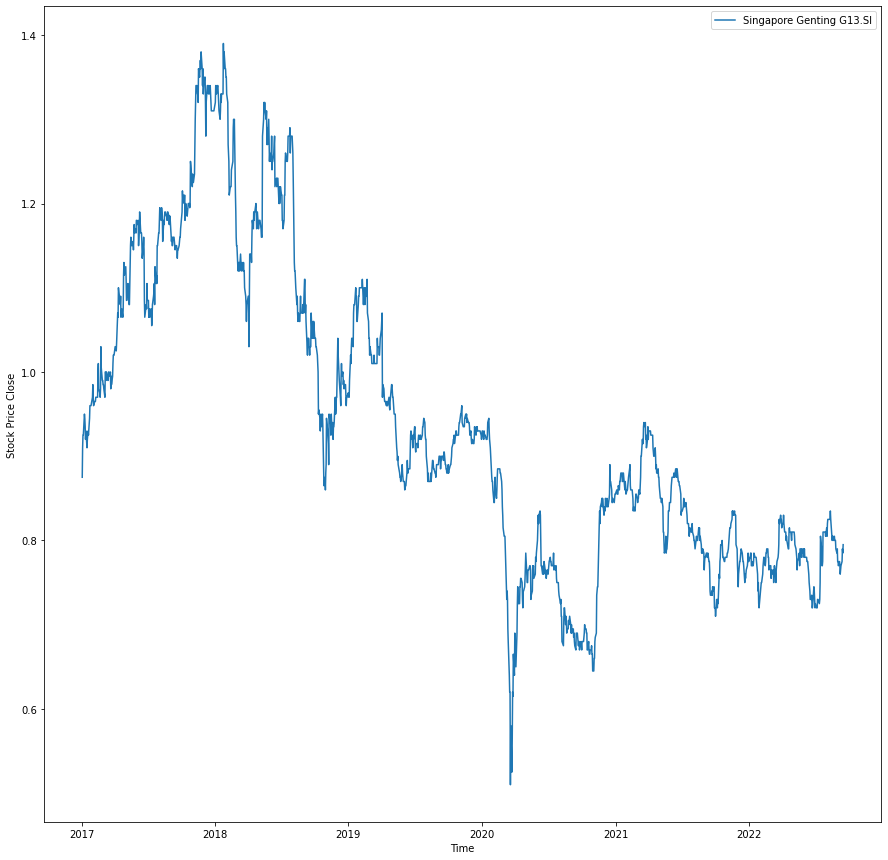

In [6]:
plt.figure(figsize=(15,15))
plt.plot(genting['Date'], genting['Close'], label='Singapore Genting G13.SI')
plt.xlabel('Time')
plt.ylabel('Stock Price Close')
plt.legend()

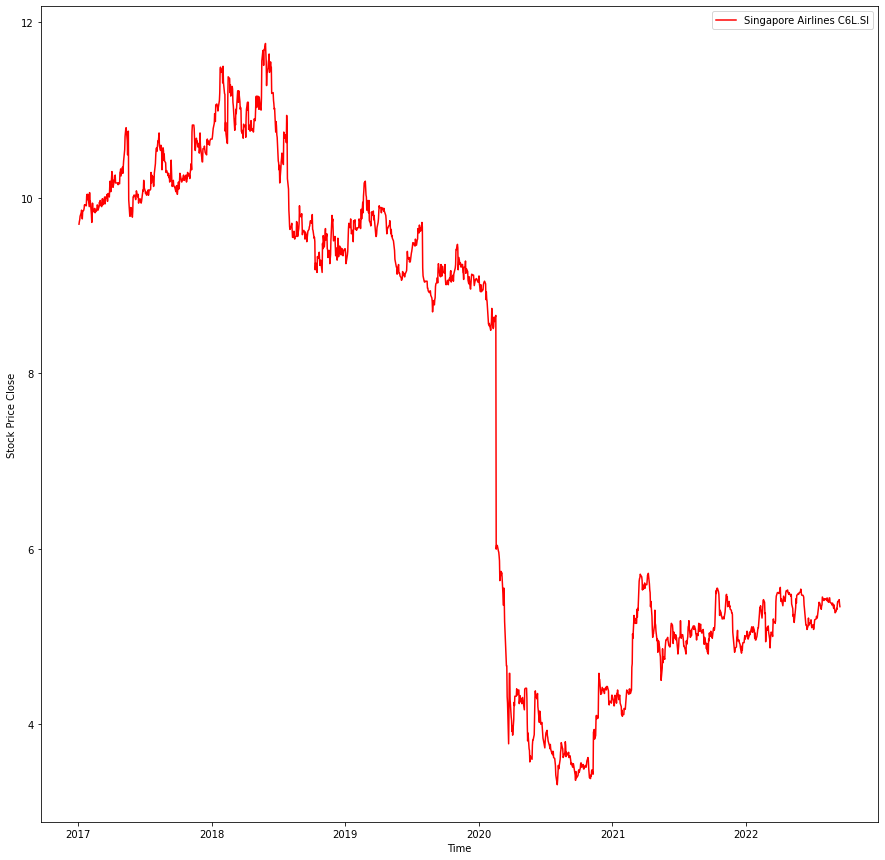

In [7]:
plt.figure(figsize=(15,15))
plt.plot(airline['Date'], airline['Close'], color='r', label='Singapore Airlines C6L.SI')
plt.xlabel('Time')
plt.ylabel('Stock Price Close')
plt.legend()

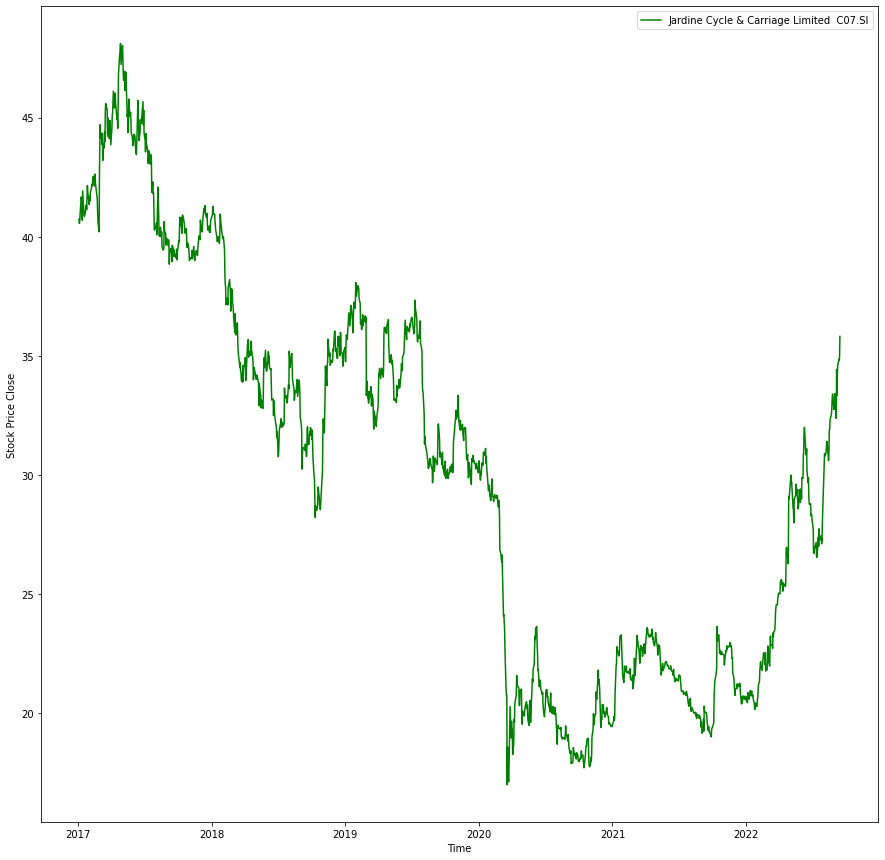

In [8]:
plt.figure(figsize=(15,15))
#plt.plot(genting['Date'], genting['Close'])
plt.plot(jardine['Date'], jardine['Close'], color='g', label='Jardine Cycle & Carriage Limited  C07.SI')
plt.xlabel('Time')
plt.ylabel('Stock Price Close')
plt.legend()

In [10]:
df = genting[['Date', 'Close']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1435 non-null   datetime64[ns]
 1   Close   1435 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.5 KB


In [12]:
df.head()

,Date,Close
0,2017-01-03,0.875
1,2017-01-04,0.910
2,2017-01-05,0.925
3,2017-01-06,0.925
4,2017-01-09,0.950


In [13]:
df_max = df['Close'].max()
df_min = df['Close'].min()

In [14]:
df_max, df_min

(1.39, 0.51)

In [15]:
scaler = MinMaxScaler()

In [16]:
df[['Close']] = scaler.fit_transform(df[['Close']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [17]:
df.head()

,Date,Close
0,2017-01-03,0.414773
1,2017-01-04,0.454545
2,2017-01-05,0.471591
3,2017-01-06,0.471591
4,2017-01-09,0.500000


In [18]:
training_data_len = int(np.ceil(len(df)*0.8))
training_data_len

1148

In [19]:
dataset = df[['Close']].values

In [20]:
training_data = dataset[0:training_data_len, :]

In [21]:
training_data.shape

(1148, 1)

In [22]:
x_train = []
y_train = []
for i in range(60, training_data_len):
    x_train.append(training_data[i-60:i, :])
    y_train.append(training_data[i,:])

In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape, y_train.shape

((1088, 60, 1), (1088, 1))

In [25]:
model  = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(60, 1)),
    tf.keras.layers.SimpleRNN(100, return_sequences=False),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [26]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9),
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [27]:
history = model.fit(x_train, y_train, epochs=100, callbacks=[tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 30))])

Epoch 1/100
34/34 [==============================] - 5s 64ms/step - loss: 0.3791 - mae: 0.8433 - lr: 1.0000e-07
Epoch 2/100
34/34 [==============================] - 2s 61ms/step - loss: 0.3783 - mae: 0.8424 - lr: 1.0798e-07
Epoch 3/100
34/34 [==============================] - 2s 63ms/step - loss: 0.3775 - mae: 0.8413 - lr: 1.1659e-07
Epoch 4/100
34/34 [==============================] - 2s 61ms/step - loss: 0.3766 - mae: 0.8401 - lr: 1.2589e-07
Epoch 5/100
34/34 [==============================] - 2s 62ms/step - loss: 0.3756 - mae: 0.8388 - lr: 1.3594e-07
Epoch 6/100
34/34 [==============================] - 2s 62ms/step - loss: 0.3745 - mae: 0.8375 - lr: 1.4678e-07
Epoch 7/100
34/34 [==============================] - 2s 62ms/step - loss: 0.3733 - mae: 0.8360 - lr: 1.5849e-07
Epoch 8/100
34/34 [==============================] - 2s 61ms/step - loss: 0.3721 - mae: 0.8344 - lr: 1.7113e-07
Epoch 9/100
34/34 [==============================] - 2s 58ms/step - loss: 0.3708 - mae: 0.8327 - lr: 1.8

(1e-08, 0.001, -1.0, 1.0)

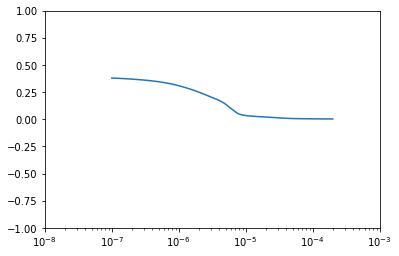

In [29]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-3, -1, 1])

In [30]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=["mae"])

In [33]:
history_2 = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 2s 70ms/step - loss: 0.0026 - mae: 0.0560
Epoch 2/500
34/34 [==============================] - 2s 56ms/step - loss: 0.0025 - mae: 0.0559
Epoch 3/500
34/34 [==============================] - 2s 57ms/step - loss: 0.0025 - mae: 0.0553
Epoch 4/500
34/34 [==============================] - 2s 56ms/step - loss: 0.0025 - mae: 0.0551
Epoch 5/500
34/34 [==============================] - 2s 56ms/step - loss: 0.0024 - mae: 0.0547
Epoch 6/500
34/34 [==============================] - 2s 57ms/step - loss: 0.0024 - mae: 0.0543
Epoch 7/500
34/34 [==============================] - 2s 57ms/step - loss: 0.0024 - mae: 0.0541
Epoch 8/500
34/34 [==============================] - 2s 57ms/step - loss: 0.0024 - mae: 0.0538
Epoch 9/500
34/34 [==============================] - 2s 57ms/step - loss: 0.0023 - mae: 0.0537
Epoch 10/500
34/34 [==============================] - 2s 69ms/step - loss: 0.0023 - mae: 0.0532
Epoch 11/500
34/34 [=============================

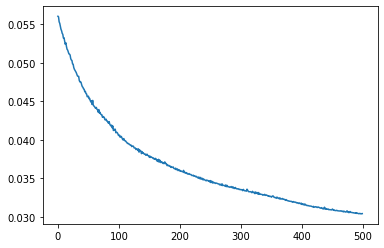

In [36]:
plt.plot(history_2.history['mae'])

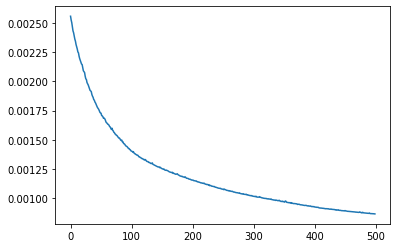

In [37]:
plt.plot(history_2.history['loss'])

In [ ]:
x_train = []
y_train = []
for i in range(60, training_data_len):
    x_train.append(training_data[i-60:i, :])
    y_train.append(training_data[i,:])
training_data = dataset[0:training_data_len, :]

In [39]:
testing_data = dataset[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(testing_data)):
    x_test.append(testing_data[i-60:i,0])



In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [44]:
x_test = x_test.reshape(-1,60,1)

In [50]:
x_test.shape, y_test.shape, x_train.shape

((287, 60, 1), (287, 1), (1088, 60, 1))

In [51]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
tr = scaler.inverse_transform(x_train.reshape(-1,60))

In [53]:
RMSE = np.sqrt(np.mean(predictions-y_test)**2)
RMSE 

0.4675811522551492

In [82]:
t = scaler.inverse_transform(genting['Close'].values.reshape(-1,1)) 
p = scaler.inverse_transform(predictions)


In [91]:
t.shape, p.shape

((1435, 1), (287, 1))

In [92]:
d = t.shape[0]-p.shape[0]
arr=np.full((d,1),np.nan)

In [94]:
r = np.concatenate((arr, p), axis=0)

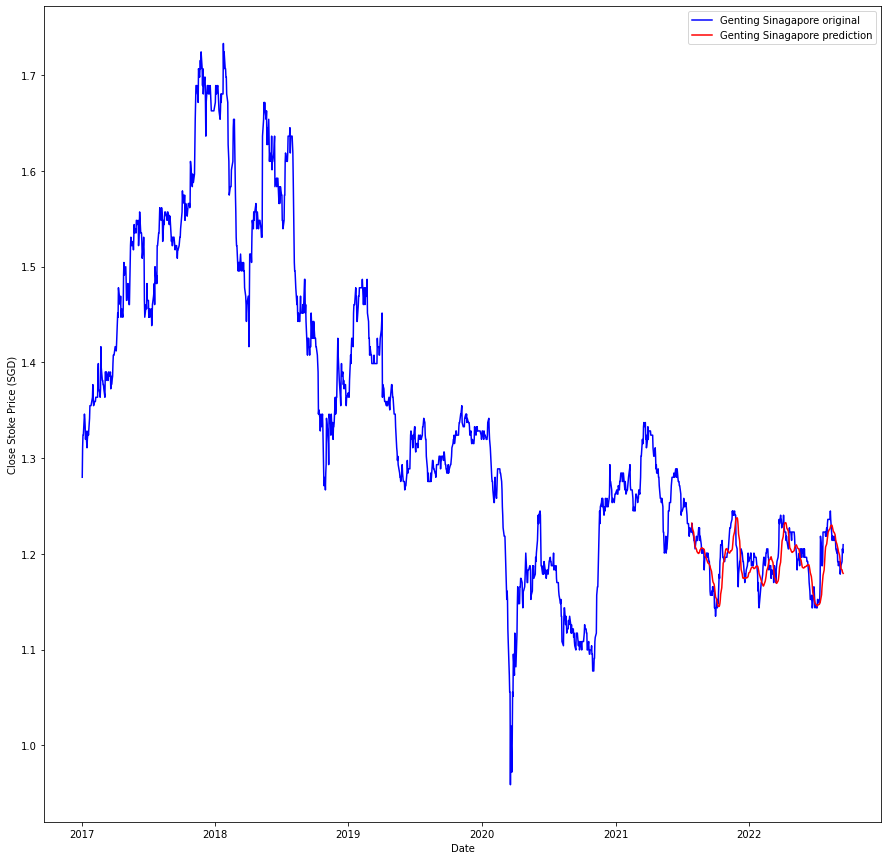

In [113]:
plt.figure(figsize=(15,15))
plt.plot(genting['Date'], t.reshape(-1), label='Genting Sinagapore original', color='b')
plt.plot(genting['Date'], r.reshape(-1), label='Genting Sinagapore prediction', color='r')
plt.xlabel("Date")
plt.ylabel("Close Stoke Price (SGD)")
plt.legend()
plt.show();